(60000, 28, 28)
(60000,)


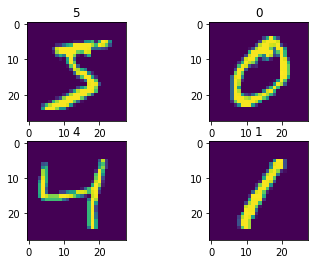

In [75]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras
import numpy as np
path = '/Users/dajiangliu/Downloads/mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
print(train_images.shape)
print(train_labels.shape)
fig, axs = plt.subplots(2,2)
for ii in np.arange(0,2):
    for jj in np.arange(0,2):
        axs[ii,jj].imshow(train_images[ii*2+jj,:,:])
        axs[ii,jj].title.set_text(train_labels[ii*2+jj])
##print(range(0,2))
##plt.show()

In [62]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [63]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [64]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [66]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [67]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2564 - accuracy: 0.9256
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1046 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0691 - accuracy: 0.9787
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0504 - accuracy: 0.9851
Epoch 5/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.0381 - accuracy: 0.9888


In [69]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 0s 28us/step
0.9786999821662903
